#Objective

1. Find out the list of most popular and liked movie
2. Create Model that finds the best suited Movie for one
user in every genre.
3. Find what Movies have received the best and
worst ratings based on User Rating.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ratings= pd.read_csv('/content/drive/MyDrive/intellipaat_assignments/Dataset for Recommendation system project/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [ ]:
movies= pd.read_csv("/content/drive/MyDrive/intellipaat_assignments/Dataset for Recommendation system project/movies.csv")

In [ ]:
ratings.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
ratings.shape

(24058263, 2)

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(27278, 3)

#Data Cleaning

In [ ]:
ratings.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
movie_id=[]

for id in ratings['Cust_Id']:
 if ':' in id:
    movid= int(id.replace(':',''))

 movie_id.append(movid)


In [ ]:
len(movie_id)

24058263

In [ ]:
len(movie_id)==ratings.shape[0]

True

In [ ]:
ratings['movieId']= movie_id

In [ ]:
ratings.head()

,Cust_Id,Rating,movieId
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1


In [ ]:
ratings.dropna(inplace=True)

In [ ]:
ratings.head()

,Cust_Id,Rating,movieId
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
 2   movieId  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


##Except the Cust_Id column, all other columns are stored in the correct datatype.

In [ ]:
ratings['Cust_Id']= ratings['Cust_Id'].astype(int)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  int64  
 1   Rating   float64
 2   movieId  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


##Excluding the movies with less ratings.

In [ ]:
temp= ratings.groupby('movieId', as_index=False)['Rating'].count()

In [ ]:
temp.head()

,movieId,Rating
0,1,547
1,2,145
2,3,2012
3,4,142
4,5,1140


In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7da7944520>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7da7944a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7da7944220>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7da7944fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7da7945240>],
 'means': []}

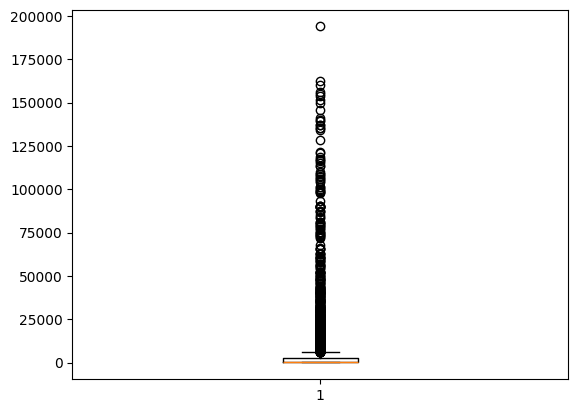

In [ ]:
plt.boxplot(temp['Rating'])

In [ ]:
temp.shape

(4499, 2)

In [ ]:
temp['Rating'].describe()

,Rating
count,4499.000000
mean,5346.468993
std,16176.313851
min,36.000000
25%,192.000000
50%,552.000000
75%,2538.000000
max,193941.000000


## Let's decide the threshold on the basis of the volumne of the data. We will consider the movies that have ratings_count over 50 percentile.

In [ ]:
threshold_value= temp['Rating'].quantile(0.5)
threshold_value

552.0

In [ ]:
temp= temp[temp['Rating']<threshold_value]
temp

,movieId,Rating
0,1,547
1,2,145
3,4,142
6,7,93
8,9,95
...,...,...
4486,4487,118
4490,4491,453
4493,4494,130
4497,4498,269


In [ ]:
rejectedLs= temp['movieId'].values
rejectedLs

array([   1,    2,    4, ..., 4494, 4498, 4499])

In [ ]:
ratings= ratings[~ratings['movieId'].isin(rejectedLs)]

In [ ]:
ratings=ratings.merge(movies, on='movieId', how= 'inner')

##1. Find what Movies have received best and worst ratings based on User Rating.

In [ ]:
temp= ratings.groupby(['movieId','title'],as_index=False)['Rating'].mean().sort_values(by='Rating', ascending= False)

In [ ]:
temp.head()

,movieId,title,Rating
1690,3456,"Color of Paradise, The (Rang-e khoda) (1999)",4.670989
1010,2102,Steamboat Willie (1928),4.581296
2067,4238,Along Came a Spider (2001),4.554434
1684,3444,Bloodsport (1988),4.516007
2167,4427,"Lion in Winter, The (1968)",4.473692


In [ ]:
temp.head()['title'].values

array(['Color of Paradise, The (Rang-e khoda) (1999)',
       'Steamboat Willie (1928)', 'Along Came a Spider (2001)',
       'Bloodsport (1988)', 'Lion in Winter, The (1968)'], dtype=object)

## The best rated movies are
* 'Color of Paradise, The (Rang-e khoda) (1999)'
* 'Steamboat Willie (1928)'
* 'Along Came a Spider (2001)'
* 'Bloodsport (1988)'
*'Lion in Winter, The (1968)'

In [ ]:
temp.tail()[::-1]

,movieId,title,Rating
314,625,Asfour Stah (1990),1.505034
833,1725,"Education of Little Tree, The (1997)",1.522137
1788,3667,Rent-A-Cop (1988),1.762584
1472,3021,"Funhouse, The (1981)",1.962784
1450,2977,Crazy in Alabama (1999),1.990991


In [ ]:
temp.tail()[::-1]['title'].values

array(['Asfour Stah (1990)', 'Education of Little Tree, The (1997)',
       'Rent-A-Cop (1988)', 'Funhouse, The (1981)',
       'Crazy in Alabama (1999)'], dtype=object)

##the worst rated movies are
* 'Asfour Stah (1990)'
* 'Education of Little Tree, The (1997)'
* 'Rent-A-Cop (1988)'
* 'Funhouse, The (1981)'
* 'Crazy in Alabama (1999)'

##2. Find out the list of most popular movie.


In [ ]:
temp= ratings.groupby(['movieId','title'],as_index=False)['Rating'].count().sort_values(by='Rating', ascending= False)

In [ ]:
temp.head()

,movieId,title,Rating
914,1905,Marie from the Bay of Angels (Marie Baie Des A...,193941
1038,2152,Air Bud: Golden Receiver (1998),162597
1884,3860,"Opportunists, The (2000)",160454
2169,4432,Sweet Smell of Success (1957),156183
287,571,"Wedding Gift, The (1994)",154832


In [ ]:
temp.head()['title'].values

array(['Marie from the Bay of Angels (Marie Baie Des Anges) (1997)',
       'Air Bud: Golden Receiver (1998)', 'Opportunists, The (2000)',
       'Sweet Smell of Success (1957)', 'Wedding Gift, The (1994)'],
      dtype=object)

##The most popular movies are
* 'Marie from the Bay of Angels (Marie Baie Des Anges) (1997)'
* 'Air Bud: Golden Receiver (1998)
* 'Opportunists, The (2000)'
* 'Sweet Smell of Success (1957)'
* 'Wedding Gift, The (1994)'

#Modeling Part

In [ ]:
!pip install Scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357298 sha256=16f5bf950432f60330decece1c65d3e7d7fd6c58cc6c36620f79cc59e40ffdfc
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built Scikit-surprise


In [ ]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [ ]:
reader= Reader()

##SVD model reads data in the following format.

In [ ]:
data=Dataset.load_from_df(ratings[["Cust_Id","movieId","Rating"]][:1000000],reader)

In [ ]:
model= SVD()

In [ ]:
cross_validate(model, data, measures= ['RMSE'],cv=3)

{'test_rmse': array([0.98481947, 0.98619651, 0.98743425]),
 'fit_time': (18.690548419952393, 17.26520848274231, 17.543113946914673),
 'test_time': (4.509685516357422, 5.149359464645386, 7.058767557144165)}

##The RMSE values (~0.9869 average) suggest the model has reasonable prediction accuracy.

#Recommendation

In [ ]:
import random

In [ ]:
user= random.choice(ratings['Cust_Id'])
user

2220019

In [ ]:
total_movies= ratings['movieId'].unique()

In [ ]:
rated_movies= ratings[ratings['Cust_Id']==user]['movieId']

In [ ]:
unrated_movies= []

for movie in total_movies:
   if movie not in rated_movies:
    unrated_movies.append(movie)

##Prediction for unrated movies for the user

In [ ]:
predictions= []

for movie in unrated_movies:
  rating=model.predict(uid= user, iid= movie).est
  predictions.append([movie,rating])

In [ ]:
len(predictions)

2201

In [ ]:
predictions[0]

[3, 3.8760431034250518]

In [ ]:
recommendation= sorted(predictions,  key= lambda x:x[1], reverse= True)[:5]

In [ ]:
recommendation= pd.DataFrame(recommendation,columns= ['movieId', 'predicted_rating'])

In [ ]:
recommendation.head()

,movieId,predicted_rating
0,106,4.439949
1,209,4.406260
2,175,4.330317
3,33,4.324402
4,167,4.321727


In [ ]:
print(f'For user {user} recommended movies are:\n')
display(recommendation.merge(movies, on='movieId', how= 'inner'))

For user 2220019 recommended movies are:



,movieId,predicted_rating,title,genres
0,106,4.439949,Nobody Loves Me (Keiner liebt mich) (1994),Comedy|Drama
1,209,4.406260,White Man's Burden (1995),Drama
2,175,4.330317,Kids (1995),Drama
3,33,4.324402,Wings of Courage (1995),Adventure|Romance|IMAX
4,167,4.321727,Feast of July (1995),Drama
